# Three-Body Problem Solver Documentation

## Overview:

This Python program provides a numerical solution to the three-body problem in both 2D and 3D space, as well as an extended version for a four-body problem in 3D space. The three-body problem involves the gravitational interaction between three celestial bodies, and the goal is to simulate their motion over time using numerical methods.

The simulation serves as a test case for an N-body simulation, focusing on scenarios with three and four bodies. The dynamics of the system are governed by the gravitational forces acting between the bodies.

## Three-Body Simulation (Phase One)

## Dependencies:

The following Python libraries are used in the program:

- `numpy`: For numerical operations.
- `scipy`: For solving ordinary differential equations (ODEs).
- `matplotlib`: For plotting trajectories.

Ensure that these libraries are installed before running the code.

## Phase One:

### 2D Three-Body Problem Solver:

The 2D three-body problem solver is implemented by solving a set of second-order ordinary differential equations (ODEs) representing the motion of three bodies in a 2D space.

#### Equations of Motion:

# Implementation:

This problem in general is a initial value problem. So, by having the initial values we want to explore the future of our dynamical system. 

$\frac{d r_{i,j}}{dt} = v_{i,j} $ for $ i \in \{1,2,3\}$ and j indicate the position component.

$\frac{d v_{i,j}}{dt} =- G \sum_{k≠i} m_j {\vec{r}_{i,j} -\vec{r_{k,j}} \over|\vec{r}_i -\vec{r_k}|^{3\over2} } $ for $ i \in \{1,2,3\}$


#### Function `dynamical2D`:

In [2]:
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt



In [3]:
def dynamical2D(t,y,m,G):
    """ 
    Three Bodies EoM:
       Inputs:
         
         t: current time steps

         Positions of the objects:
         y[0],y[1] = x1,x2
         y[2],y[3] = y1,y2
         y[4],y[5] = z1,z2
         
         Velocity of the objects:
         y[6],y[7] = V1x, V1y
         y[8],y[9] = V2x, V2y
         y[10],y[11] = V3x, V3y
    """
    
    dydt = np.zeros_like(y)
    dydt[:6] = y[6:] 

    dydt[6] = -G * (m[1]*(y[0]-y[2])/((y[0]-y[2])**2+(y[1]-y[3])**2)**(3/2)+m[2]*(y[0]-y[4])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2))
    dydt[7] = -G * (m[1]*(y[1]-y[3])/((y[0]-y[2])**2+(y[1]-y[3])**2)**(3/2)+m[2]*(y[1]-y[5])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2))

    dydt[8] = -G * (m[0]*(y[2]-y[0])/((y[0]-y[2])**2+(y[1]-y[3])**2)**(3/2)+ m[2]*(y[2]-y[4])/((y[2]-y[4])**2+(y[3]-y[5])**2)**(3/2))
    dydt[9] = -G * (m[0]*(y[3]-y[1])/((y[0]-y[2])**2+(y[1]-y[3])**2)**(3/2)+ m[2]*(y[3]-y[5])/((y[2]-y[4])**2+(y[3]-y[5])**2)**(3/2))

    dydt[10] = -G * (m[0]*(y[4]-y[0])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2)+ m[1]*(y[4]-y[2])/((y[2]-y[4])**2+(y[3]-y[5])**2)**(3/2))
    dydt[11] = -G * (m[0]*(y[5]-y[1])/((y[0]-y[4])**2+(y[1]-y[5])**2)**(3/2)+ m[1]*(y[5]-y[3])/((y[2]-y[4])**2+(y[3]-y[5])**2)**(3/2))

    return dydt



#### Example Usage:

In [4]:
""" Set the initials and masses of bodies """
m1 = 100
m2 =100_000
m3 = 100
m=np.array([m1,m2,m3])
y0=np.zeros(12)

# Initial Positions of the objects:
y0[0],y0[1] = 150,20 # green body
y0[2],y0[3] = 0,0  # red body
y0[4],y0[5] = 150,10  # blue body
        
# Initial Velocity of the objects:
y0[6],y0[7] = 20,0
y0[8],y0[9] = 0, 0
y0[10],y0[11] = 0, 20


N = 1000 #number of sample
tau = 100 #time period in seconds
t = np.linspace(0,tau,N)
solution2D = integ.solve_ivp(dynamical2D,(0,tau),y0,args=(m,1,),t_eval=t,rtol=1e-12)
solution2D

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-01 ...  9.990e+01  1.000e+02]
        y: [[ 1.500e+02  1.520e+02 ...  6.230e+01  5.736e+01]
            [ 2.000e+01  1.999e+01 ... -8.810e+00 -8.695e+00]
            ...
            [ 0.000e+00 -4.264e-01 ... -2.671e+01 -2.690e+01]
            [ 2.000e+01  2.009e+01 ... -2.267e+00 -2.906e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 5600
     njev: 0
      nlu: 0

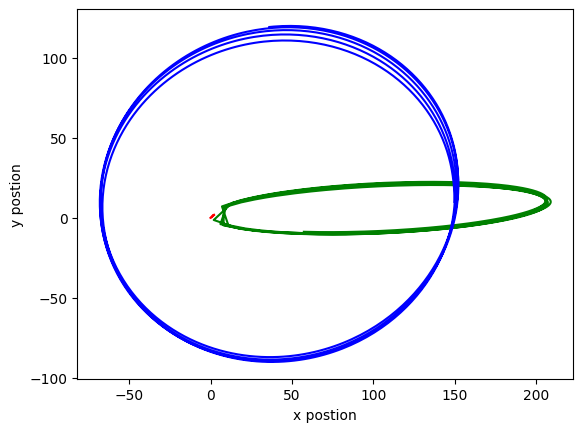

In [5]:
plt.plot(solution2D.y[0],solution2D.y[1],'g-')
plt.plot(solution2D.y[2],solution2D.y[3],'r-')
plt.plot(solution2D.y[4],solution2D.y[5],'b-')
plt.ylabel("y postion")
plt.xlabel("x postion")
plt.show()

 ### 3D Three-Body Problem Solver:

The 3D three-body problem solver extends the 2D solver to three dimensions, considering the motion of three bodies in a 3D space.

#### Equations of Motion:

The equations are the same as the 2D case, but considering three spatial dimensions.

#### Function `dynamical3D`:


In [6]:
def dynamical3D(t,y,m,G):
    """ 
    Three Bodies EoM:
       Inputs:
         
         t: current time steps

         Positions of the objects:
         y[0],y[1],y[2] = x1,x2,x3
         y[3],y[4],y[5] = y1,y2,y3
         y[6],y[7],y[8] = z1,z2,z3
         
         Velocity of the objects:
         y[9],y[10],y[11] = V1x, V1y,V1z
         y[12],y[13],y[14] = V2x, V2y,V2z
         y[15],y[16],y[17] = V3x, V3y,V3z
    """
    
    dydt = np.zeros_like(y)
    dydt[:9] = y[9:] 

    dydt[9] = -G * (m[1]* (y[0]-y[3])/((y[0]-y[3])**2+(y[1]-y[4])**2+(y[2]-y[5])**2)**(3/2)
                          +m[2]* (y[0]-y[6])/((y[0]-y[6])**2+(y[1]-y[7])**2+(y[2]-y[8])**2)**(3/2))
    dydt[10] = -G * (m[1]* (y[1]-y[4])/((y[0]-y[3])**2+(y[1]-y[4])**2+(y[2]-y[5])**2)**(3/2)
                           +m[2]* (y[1]-y[7])/((y[0]-y[6])**2+(y[1]-y[7])**2+(y[2]-y[8])**2)**(3/2))
    dydt[11] = -G *  (m[1]* (y[2]-y[5])/((y[0]-y[3])**2+(y[1]-y[4])**2+(y[2]-y[5])**2)**(3/2)
                           +m[2]* (y[2]-y[8])/((y[0]-y[6])**2+(y[1]-y[7])**2+(y[2]-y[8])**2)**(3/2))


    dydt[12] = -G * (m[0]*(y[3]-y[0])/((y[0]-y[3])**2+(y[1]-y[4])**2+(y[2]-y[5])**2)**(3/2)
                          +m[2]*(y[3]-y[6])/((y[3]-y[6])**2+(y[4]-y[7])**2+(y[5]-y[8])**2)**(3/2))
    dydt[13] = -G * (m[0]*(y[4]-y[1])/((y[0]-y[3])**2+(y[1]-y[4])**2+(y[2]-y[5])**2)**(3/2)
                          +m[2]*(y[4]-y[7])/((y[3]-y[6])**2+(y[4]-y[7])**2+(y[5]-y[8])**2)**(3/2))
    dydt[14] = -G * (m[0]*(y[5]-y[2])/((y[0]-y[3])**2+(y[1]-y[4])**2+(y[2]-y[5])**2)**(3/2)
                          +m[2]*(y[5]-y[8])/((y[3]-y[6])**2+(y[4]-y[7])**2+(y[5]-y[8])**2)**(3/2))


    dydt[15] = -G *(m[0]*(y[6]-y[0])/((y[0]-y[6])**2+(y[1]-y[7])**2+(y[2]-y[8])**2)**(3/2)
                           +m[1]*(y[6]-y[3])/((y[3]-y[6])**2+(y[4]-y[7])**2+(y[5]-y[8])**2)**(3/2))
    dydt[16] = -G *(m[0]*(y[7]-y[1])/((y[0]-y[6])**2+(y[1]-y[7])**2+(y[2]-y[8])**2)**(3/2)
                           +m[1]*(y[7]-y[4])/((y[3]-y[6])**2+(y[4]-y[7])**2+(y[5]-y[8])**2)**(3/2))
    dydt[17] = -G *(m[0]*(y[8]-y[2])/((y[0]-y[6])**2+(y[1]-y[7])**2+(y[2]-y[8])**2)**(3/2)
                           +m[1]*(y[8]-y[5])/((y[3]-y[6])**2+(y[4]-y[7])**2+(y[5]-y[8])**2)**(3/2))

    return dydt


#### Example Usage:

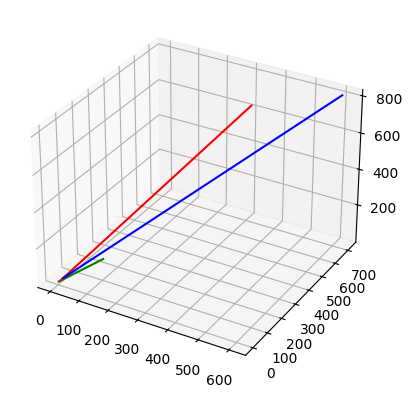

In [12]:
""" Set the initials and masses of bodies """
y3d0=np.zeros(18)
m=np.array([1,1,1])
#Positions of the objects:3d0
y3d0[0],y3d0[1],y3d0[2] = 1,2,3
y3d0[3],y3d0[4],y3d0[5] =  4,5,6
y3d0[6],y3d0[7],y3d0[8] = 10,14,18
         

#Velocity of the objects:
y3d0[9],y3d0[10],y3d0[11] =  1,1,1
y3d0[12],y3d0[13],y3d0[14] =  4,5,8
y3d0[15],y3d0[16],y3d0[17] = 6,7,8

solution3D = integ.solve_ivp(dynamical3D,(0,100), y3d0,args=(m,1,),t_eval=t,rtol=1e-12)

fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.plot3D(solution3D.y[0],solution3D.y[1],solution3D.y[2],'g-')
ax.plot3D(solution3D.y[3],solution3D.y[4],solution3D.y[5],'r-')
ax.plot3D(solution3D.y[6],solution3D.y[7],solution3D.y[8],'b-')

## Earth-Sun-Moon 

In [8]:
import numpy as np
from scipy.integrate import solve_ivp

def dynamical4D(t, y, m, G):
     """ 
    Four Bodies EoM:
       Inputs:
         
         t: current time steps

         Positions of the objects:
         y[0], y[1], y[2] = x1, x2, x3
         y[3], y[4], y[5] = y1, y2, y3
         y[6], y[7], y[8] = z1, z2, z3
         y[9], y[10], y[11] = w1, w2, w3

         
         Velocity of the objects:
         y[12], y[13], y[14] = V1x, V1y, V1z
         y[15], y[16], y[17] = V2x, V2y, V2z
         y[18], y[19], y[20] = V3x, V3y, V3z
         y[21], y[22], y[23] = V4x, V4y, V4z
    """
    
     dydt = np.zeros_like(y)

     dydt[:12] = y[12:]

     dydt[12] = -G * (m[1] * (y[0] - y[3]) / ((y[0] - y[3])**2 + (y[1] - y[4])**2 + (y[2] - y[5])**2)**(3/2)
                    + m[2] * (y[0] - y[6]) / ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3/2)
                    + m[3] * (y[0] - y[9]) / ((y[0] - y[9])**2 + (y[1] - y[10])**2 + (y[2] - y[11])**2)**(3/2))
    
     dydt[13] = -G * (m[1] * (y[1] - y[4]) / ((y[0] - y[3])**2 + (y[1] - y[4])**2 + (y[2] - y[5])**2)**(3/2)
                    + m[2] * (y[1] - y[7]) / ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3/2)
                    + m[3] * (y[1] - y[10]) / ((y[0] - y[9])**2 + (y[1] - y[10])**2 + (y[2] - y[11])**2)**(3/2))
    
     dydt[14] = -G * (m[1] * (y[2] - y[5]) / ((y[0] - y[3])**2 + (y[1] - y[4])**2 + (y[2] - y[5])**2)**(3/2)
                    + m[2] * (y[2] - y[8]) / ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3/2)
                    + m[3] * (y[2] - y[11]) / ((y[0] - y[9])**2 + (y[1] - y[10])**2 + (y[2] - y[11])**2)**(3/2))
    
     dydt[15] = -G * (m[0] * (y[3] - y[0]) / ((y[0] - y[3])**2 + (y[1] - y[4])**2 + (y[2] - y[5])**2)**(3/2)
                    + m[2] * (y[3] - y[6]) / ((y[3] - y[6])**2 + (y[4] - y[7])**2 + (y[5] - y[8])**2)**(3/2)
                    + m[3] * (y[3] - y[9]) / ((y[3] - y[9])**2 + (y[4] - y[10])**2 + (y[5] - y[11])**2)**(3/2))
    
     dydt[16] = -G * (m[0] * (y[4] - y[1]) / ((y[0] - y[3])**2 + (y[1] - y[4])**2 + (y[2] - y[5])**2)**(3/2)
                    + m[2] * (y[4] - y[7]) / ((y[3] - y[6])**2 + (y[4] - y[7])**2 + (y[5] - y[8])**2)**(3/2)
                    + m[3] * (y[4] - y[10]) / ((y[3] - y[9])**2 + (y[4] - y[10])**2 + (y[5] - y[11])**2)**(3/2))
    
     dydt[17] = -G * (m[0] * (y[5] - y[2]) / ((y[0] - y[3])**2 + (y[1] - y[4])**2 + (y[2] - y[5])**2)**(3/2)
                    + m[2] * (y[5] - y[8]) / ((y[3] - y[6])**2 + (y[4] - y[7])**2 + (y[5] - y[8])**2)**(3/2)
                    + m[3] * (y[5] - y[11]) / ((y[3] - y[9])**2 + (y[4] - y[10])**2 + (y[5] - y[11])**2)**(3/2))
    
     dydt[18] = -G * (m[0] * (y[6] - y[0]) / ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3/2)
                    + m[1] * (y[6] - y[3]) / ((y[3] - y[6])**2 + (y[4] - y[7])**2 + (y[5] - y[8])**2)**(3/2)
                    + m[3] * (y[6] - y[9]) / ((y[6] - y[9])**2 + (y[7] - y[10])**2 + (y[8] - y[11])**2)**(3/2))
    
     dydt[19] = -G * (m[0] * (y[7] - y[1]) / ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3/2)
                    + m[1] * (y[7] - y[4]) / ((y[3] - y[6])**2 + (y[4] - y[7])**2 + (y[5] - y[8])**2)**(3/2)
                    + m[3] * (y[7] - y[10]) / ((y[6] - y[9])**2 + (y[7] - y[10])**2 + (y[8] - y[11])**2)**(3/2))
    
     dydt[20] = -G * (m[0] * (y[8] - y[2]) / ((y[0] - y[6])**2 + (y[1] - y[7])**2 + (y[2] - y[8])**2)**(3/2)
                    + m[1] * (y[8] - y[5]) / ((y[3] - y[6])**2 + (y[4] - y[7])**2 + (y[5] - y[8])**2)**(3/2)
                    + m[3] * (y[8] - y[11]) / ((y[6] - y[9])**2 + (y[7] - y[10])**2 + (y[8] - y[11])**2)**(3/2))

     dydt[21] = -G * (m[0] * (y[9] - y[0]) / ((y[0] - y[9])**2 + (y[1] - y[10])**2 + (y[2] - y[11])**2)**(3/2)
                    + m[1] * (y[9] - y[3]) / ((y[3] - y[9])**2 + (y[4] - y[10])**2 + (y[5] - y[11])**2)**(3/2)
                    + m[2] * (y[9] - y[6]) / ((y[6] - y[9])**2 + (y[7] - y[10])**2 + (y[8] - y[11])**2)**(3/2))
    
     dydt[22] = -G * (m[0] * (y[10] - y[1]) / ((y[0] - y[9])**2 + (y[1] - y[10])**2 + (y[2] - y[11])**2)**(3/2)
                    + m[1] * (y[10] - y[4]) / ((y[3] - y[9])**2 + (y[4] - y[10])**2 + (y[5] - y[11])**2)**(3/2)
                    + m[2] * (y[10] - y[7]) / ((y[6] - y[9])**2 + (y[7] - y[10])**2 + (y[8] - y[11])**2)**(3/2))

     dydt[23] = -G * (m[0] * (y[11] - y[2]) / ((y[0] - y[9])**2 + (y[1] - y[10])**2 + (y[2] - y[11])**2)**(3/2)
                    + m[1] * (y[11] - y[5]) / ((y[3] - y[9])**2 + (y[4] - y[10])**2 + (y[5] - y[11])**2)**(3/2)
                    + m[2] * (y[11] - y[8]) / ((y[6] - y[9])**2 + (y[7] - y[10])**2 + (y[8] - y[11])**2)**(3/2))
     
     return dydt





### Test case

To check whether it's compatible with 3 -body program or not!

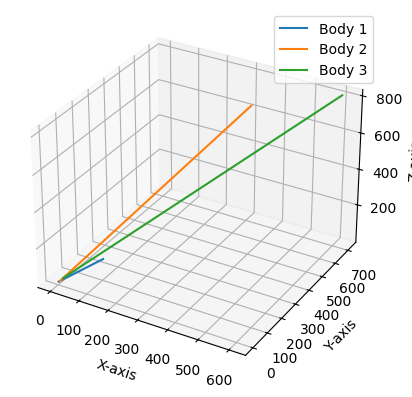

In [11]:
# Define masses, initial conditions, and other parameters
m = np.array([1.0, 1.0, 1.0, 1.0])  # masses of the four bodies
G = 1.0  # gravitational constant

y4D0 = np.ones(24)

#Positions of the objects:
y4D0[0], y4D0[1], y4D0[2] = 1,2,3
y4D0[3], y4D0[4], y4D0[5] = 4,5,6
y4D0[6], y4D0[7], y4D0[8] = 10,14,18
y4D0[9], y4D0[10], y4D0[11] = 14000,5000,80000

         
#Velocity of the objects:
y4D0[12], y4D0[13], y4D0[14] = 1,1,1
y4D0[15], y4D0[16], y4D0[17] = 4,5,8
y4D0[18], y4D0[19], y4D0[20] = 6,7,8
y4D0[21], y4D0[22], y4D0[23] = 0,0,0


N = 1000 #number of sample
tau = 100 #time period in seconds
t = np.linspace(0,tau,N)

# Solve the system of ODEs
sol = solve_ivp(dynamical4D, (0,tau), y4D0, args=(m, G,), t_eval=t, rtol=1e-12)



# Plot the trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(sol.y[0], sol.y[1], sol.y[2], label='Body 1')
ax.plot3D(sol.y[3], sol.y[4], sol.y[5], label='Body 2')
ax.plot3D(sol.y[6], sol.y[7], sol.y[8], label='Body 3')
#ax.plot3D(sol.y[9], sol.y[10], sol.y[11], label='Body 4')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

plt.show()